In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 데이터셋 인스턴스 생성

data = pd.read_csv('C:/Users/ghom9/Downloads/BP_data.csv')  # CSV 파일 경로
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


# 결측치 확인

In [3]:
print(data.isna().sum())

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


# 결측치 평균값으로

In [4]:
for i in ['Genetic_Pedigree_Coefficient', 'Pregnancy', 'alcohol_consumption_per_day']:
    mean_age = data[i].mean()

    data['AGenetic_Pedigree_Coefficientge'] = data[i].fillna(mean_age)

    most_common_embarked = data[i].mode()[0]

    data[i] = data[i].fillna(most_common_embarked)

    data.isnull().sum()

In [5]:
print(data.isna().sum())

Patient_Number                     0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient       0
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day        0
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
AGenetic_Pedigree_Coefficientge    0
dtype: int64


# 레이블 확인

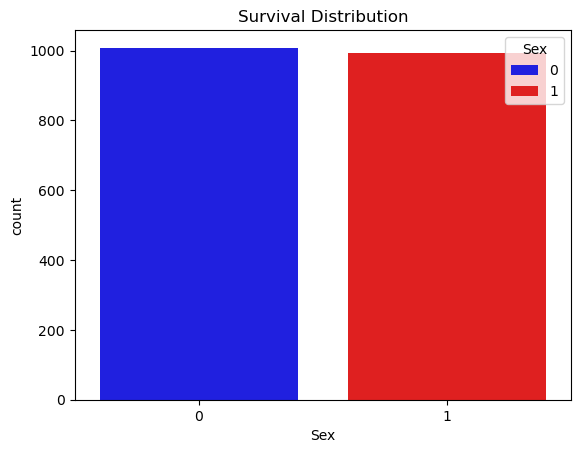

Sex
0    0.504
1    0.496
Name: proportion, dtype: float64


In [6]:
# 레이블 확인 (imbalanced data) -> 목표변수의 분포를 확인하여 데이터 불균형확인

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=data, hue='Sex', palette=['blue', 'red']) #Survived 컬럼의 데이터 개수를 시각화
plt.title("Survival Distribution") #그래프 제목 설정
plt.show()                         #그래프 출력
print(data['Sex'].value_counts(normalize=True))

In [10]:
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [11]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 15), (400, 15), (1600,), (400,))

In [13]:
# tensors로 변환
# dtype은 값의 형태에 따라서 설정
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [14]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 15]),
 torch.Size([400, 15]),
 torch.Size([1600]),
 torch.Size([400]))

# 모델정의

In [19]:
class diabetesDense(nn.Module):
    def __init__(self):
        super(diabetesDense, self).__init__()
        self.fc1 = nn.Linear(15, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # ~ classes in the dataset nn.Linear(16, ~)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = diabetesDense()

In [21]:
criterion = nn.BCEWithLogitsLoss() #이진분류 -> nn.BCEWithLogitsLoss(), 다중분류 -> nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델학습

In [22]:
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train() # 모델을 학습 모드로 전환
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.view(-1, 1).float()  # shape: (batch_size, 1), type: float
        optimizer.zero_grad()  # 기존에 누적된 gradient 초기화

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))
    
    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.view(-1, 1).float()
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)  # 확률
            predicted = (probs >= 0.5).float()
            labels = labels.float()  # 정수일 수 있으므로 float으로 변환
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")


Epoch 1/30, Loss: 0.6523, Accuracy: 72.00%
Epoch 2/30, Loss: 0.5510, Accuracy: 73.75%
Epoch 3/30, Loss: 0.5039, Accuracy: 73.75%
Epoch 4/30, Loss: 0.4800, Accuracy: 74.25%
Epoch 5/30, Loss: 0.4569, Accuracy: 76.00%
Epoch 6/30, Loss: 0.4332, Accuracy: 77.75%
Epoch 7/30, Loss: 0.4116, Accuracy: 81.50%
Epoch 8/30, Loss: 0.3847, Accuracy: 84.25%
Epoch 9/30, Loss: 0.3589, Accuracy: 86.50%
Epoch 10/30, Loss: 0.3353, Accuracy: 85.75%
Epoch 11/30, Loss: 0.3185, Accuracy: 87.25%
Epoch 12/30, Loss: 0.3047, Accuracy: 87.75%
Epoch 13/30, Loss: 0.2944, Accuracy: 87.25%
Epoch 14/30, Loss: 0.2882, Accuracy: 87.25%
Epoch 15/30, Loss: 0.2823, Accuracy: 87.00%
Epoch 16/30, Loss: 0.2742, Accuracy: 87.25%
Epoch 17/30, Loss: 0.2688, Accuracy: 87.00%
Epoch 18/30, Loss: 0.2681, Accuracy: 89.25%
Epoch 19/30, Loss: 0.2660, Accuracy: 88.00%
Epoch 20/30, Loss: 0.2593, Accuracy: 87.75%
Epoch 21/30, Loss: 0.2558, Accuracy: 88.75%
Epoch 22/30, Loss: 0.2497, Accuracy: 88.25%
Epoch 23/30, Loss: 0.2433, Accuracy: 87.0

In [23]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        predicted = (probs >= 0.5).int().view(-1)  # 예측 결과 0 또는 1로 만들기

        all_labels.extend(labels.int().view(-1).cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[184  24]
 [ 27 165]]
F1 Score: 0.87
Precision: 0.87
Recall: 0.87
Specificity: 0.87


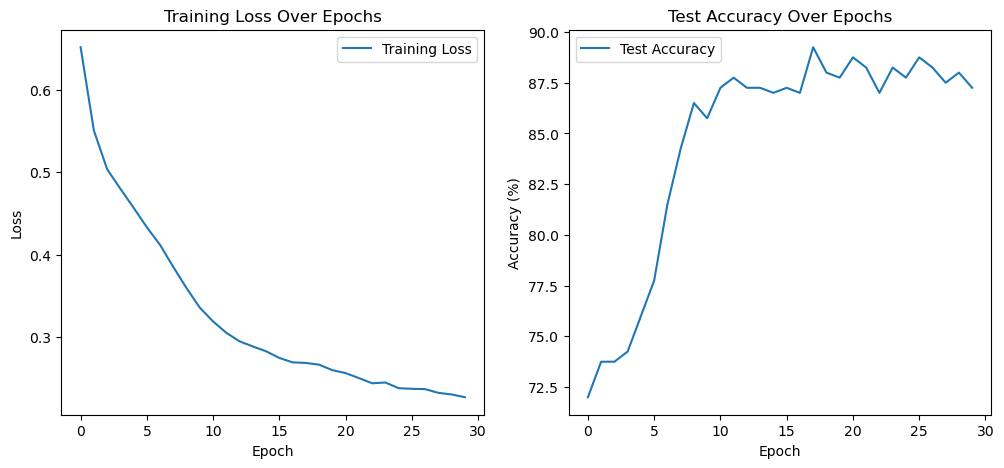

In [24]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()